*Brian Blaylock  
September 21, 2018*

# HRRR Terrain

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')

from BB_HRRR.HRRR_Pando import get_hrrr_variable
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap

In [15]:
H = get_hrrr_variable(datetime(2018, 9, 1), 'HGT:surface')
Hlm = get_hrrr_variable(datetime(2018, 9, 1), 'LAND:surface') 
Hlmv2 = get_hrrr_variable(datetime(2018, 1, 1), 'LAND:surface') 
Hv2 = get_hrrr_variable(datetime(2018, 9, 1), 'HGT:surface')


 >> Dowloading tempfile: ./temp_hrrr_2018090100_f00_HGT.grib2
Oh, good, you requested a date that should be on Pando.
GRIB2 File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180901/hrrr.t00z.wrfsfcf00.grib2
 .idx File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180901/hrrr.t00z.wrfsfcf00.grib2.idx
 >> Matched a variable:  58:28773991:d=2018090100:HGT:surface:anl:
 >> Byte Range: 28773991 31008767

 >> Dowloading tempfile: ./temp_hrrr_2018090100_f00_LAN.grib2
Oh, good, you requested a date that should be on Pando.
GRIB2 File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180901/hrrr.t00z.wrfsfcf00.grib2
 .idx File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180901/hrrr.t00z.wrfsfcf00.grib2.idx
 >> Matched a variable:  143:100002058:d=2018090100:LAND:surface:anl:
 >> Byte Range: 100002058 100052533

 >> Dowloading tempfile: ./temp_hrrr_2018010100_f00_LAN.grib2
Oh, good, you requested a date that should be on Pando.
GRIB2 File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180101/hrrr

In [3]:
masked = H['value']
#masked = np.ma.array(masked)
masked[Hlm['value'] == 0] = -1000

In [8]:
m = draw_HRRR_map()

In [9]:
mm = draw_centermap(lon=-101.455075, lat=38.116584, size=(8,5))

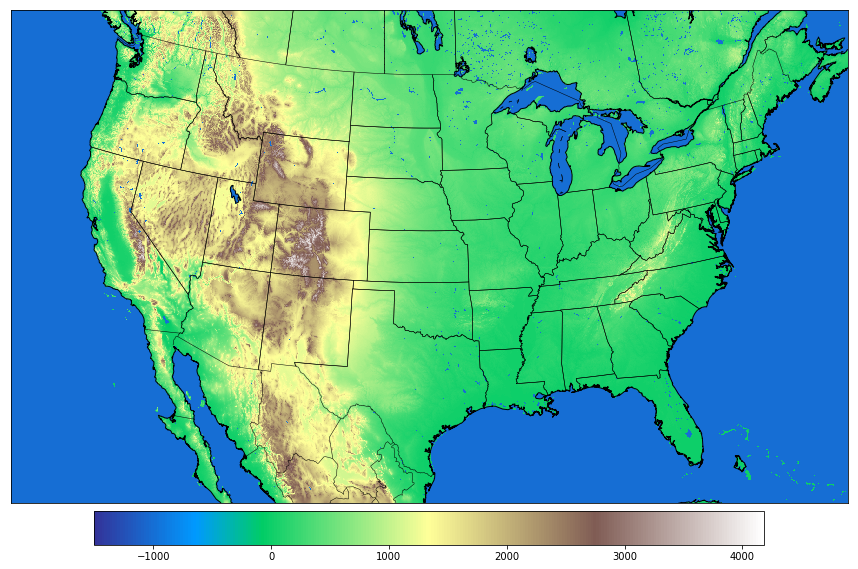

In [10]:
plt.figure(figsize=(15,15))
m.pcolormesh(H['lon'], H['lat'], masked, latlon=True, cmap='terrain', vmin=-1500)
plt.colorbar(orientation='horizontal', pad=.01, shrink=.8)

m.drawcoastlines()
m.drawcountries()
m.drawstates()

In [12]:
Hlm['value']-Hlmv2['value']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

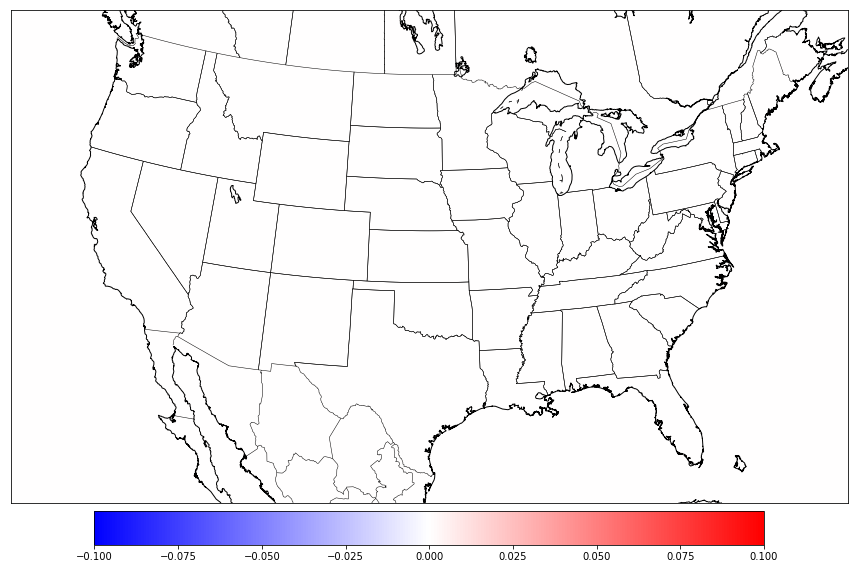

In [16]:
plt.figure(figsize=(15,15))
m.pcolormesh(H['lon'], H['lat'], H['value']-Hv2['value'], latlon=True, cmap='bwr')
plt.colorbar(orientation='horizontal', pad=.01, shrink=.8)

m.drawcoastlines()
m.drawcountries()
m.drawstates()

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


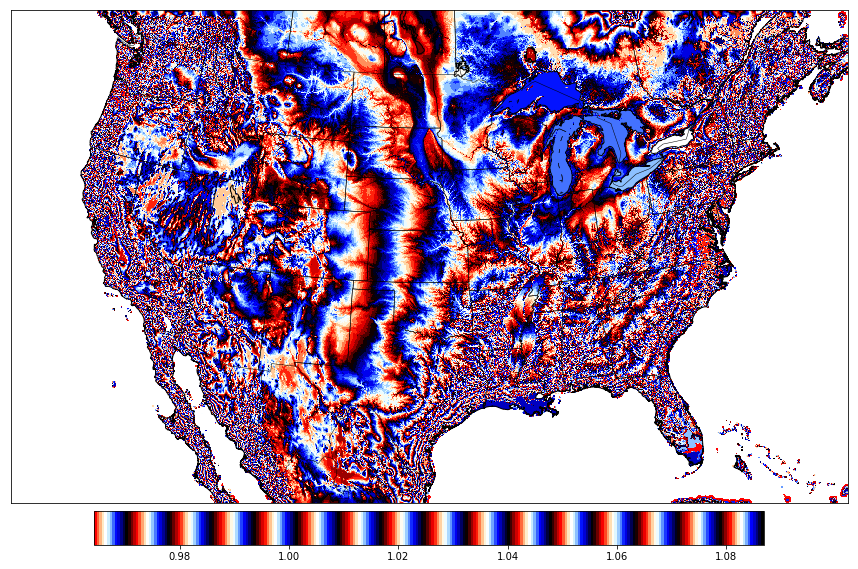

In [63]:
power = .01

plt.figure(figsize=(15,15))
m.pcolormesh(H['lon'], H['lat'], H['value']**power, latlon=True, cmap='flag')
plt.colorbar(orientation='horizontal', pad=.01, shrink=.8)

m.drawcoastlines()
m.drawcountries()
m.drawstates()

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


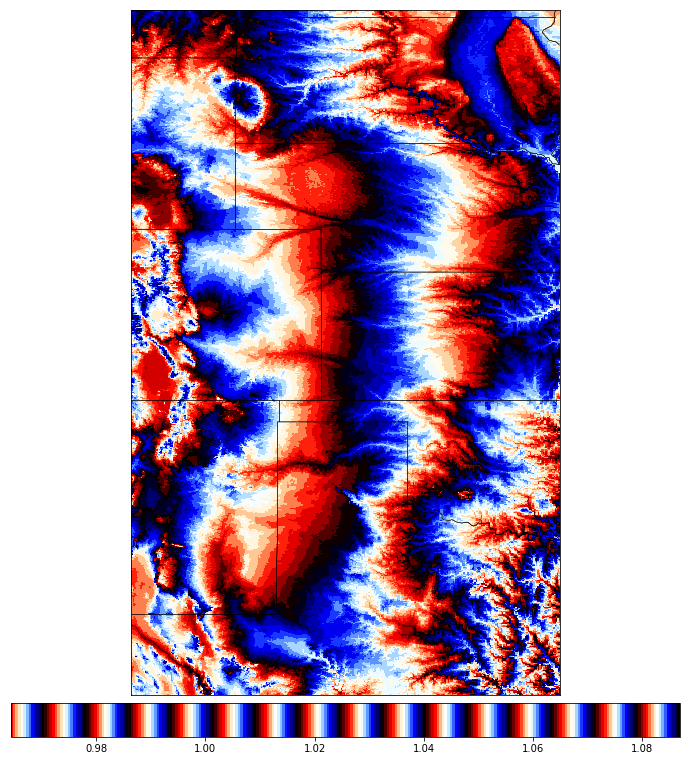

In [74]:
power = .01

plt.figure(figsize=(15,15))
mm.pcolormesh(H['lon'], H['lat'], H['value']**power, latlon=True, cmap='flag')
plt.colorbar(orientation='horizontal', pad=.01, shrink=.8)

mm.drawcoastlines()
mm.drawcountries()
mm.drawstates()